In [1]:
#load packages
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#processed data
df = pd.read_csv("Book2.csv", comment='#')



Millero2006pK1 =  5.896630791732889 
Millero2006pK2 =  9.060701042040705 
df

,ID,pK1_m,pK2_m,pK1_c,pK2_c,pK1,pK2
0,BP7,5.864,9.038,5.894,9.056,-0.030,-0.017
1,BP7,5.832,9.050,5.894,9.056,-0.062,-0.006
2,BP7,5.842,9.041,5.894,9.056,-0.052,-0.015
3,BP7,5.830,9.099,5.894,9.056,-0.064,0.043
4,BP7,5.836,8.811,5.894,9.056,-0.058,-0.245
5,BP8,5.814,9.038,5.894,9.055,-0.080,-0.017
6,BP8,5.840,9.074,5.894,9.055,-0.054,0.019
7,BP8,5.841,9.096,5.894,9.055,-0.053,0.041
8,BP8,5.811,8.918,5.894,9.055,-0.083,-0.137
9,BP8,5.833,8.935,5.894,9.055,-0.061,-0.120


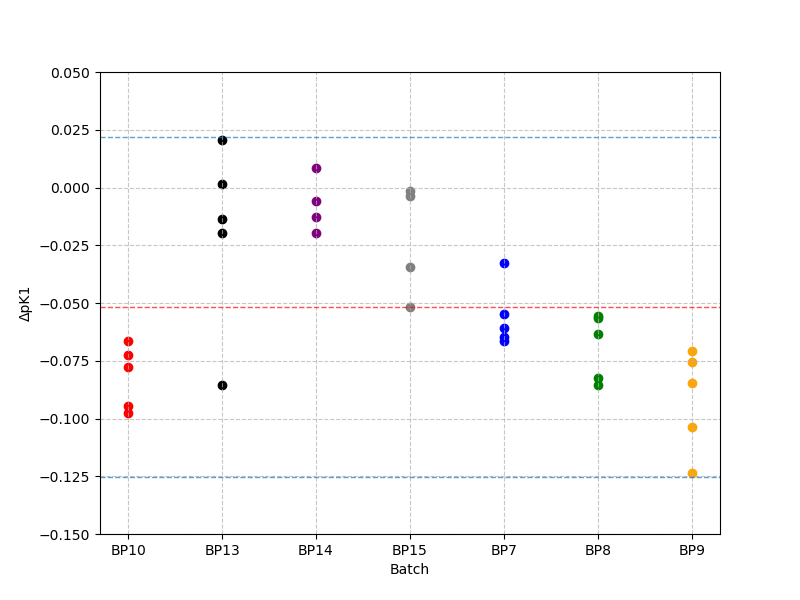

In [3]:


pk1_fit = df['pK1_m']
pk1_calc = df['pK1_c']
delta_pk1 = pk1_fit - Millero2006pK1 #meas - calc



batches = {ID: group for ID, group in df.groupby('ID')}

colors = {
    'BP7': 'blue',
    'BP8': 'green',
    'BP9': 'orange',
    'BP10': 'red',
    'BP13': 'black',
    'BP14': 'purple',
    'BP15': 'grey',
}

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.set_ylabel("ΔpK1")
ax.set_xlabel("Batch")
ax.set_ylim(-0.15,0.05)

for ID, group in batches.items():
    ax.scatter(group['ID'], group['pK1_m']-Millero2006pK1, color=colors[ID], label=ID)


ax.grid(True, linestyle='--', alpha=0.7)
# ax.legend(title='batch')
ax.axhline(delta_pk1.mean() + 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # +2σ 
ax.axhline(delta_pk1.mean(), linestyle='--', linewidth=1, alpha=0.7, color='red')
ax.axhline(delta_pk1.mean() - 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # -2σ 


plt.show()


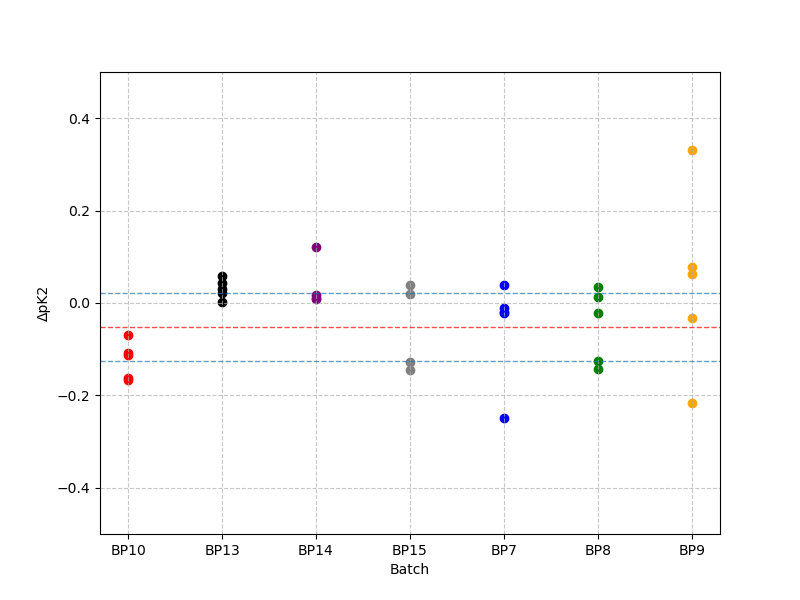

In [4]:


pk2_fit = df['pK2_m']
pk2_calc = df['pK2_c']
delta_pk2 = pk2_fit - Millero2006pK2 #meas - calc



batches = {ID: group for ID, group in df.groupby('ID')}


fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.set_ylabel("ΔpK2")
ax.set_xlabel("Batch")
ax.set_ylim(-0.5,0.5)

for ID, group in batches.items():
    ax.scatter(group['ID'], group['pK2_m']-Millero2006pK2, color=colors[ID], label=ID)


ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(delta_pk1.mean() + 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # +2σ 
ax.axhline(delta_pk1.mean(), linestyle='--', linewidth=1, alpha=0.7, color='red')
ax.axhline(delta_pk1.mean() - 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # -2σ 


plt.show()





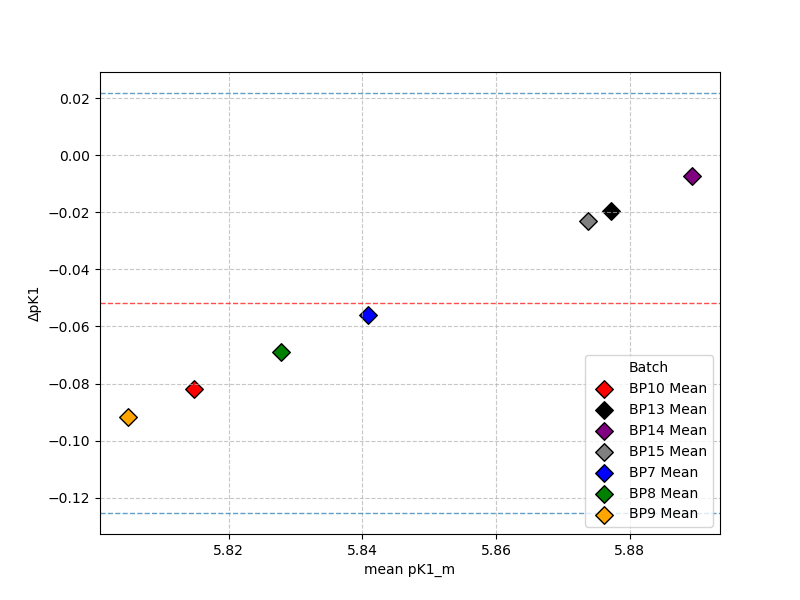

In [5]:

#Delta pK1 vs. Batch Mean pK1 Comparison
fig2 = plt.figure(figsize=(8, 6))
ax = plt.axes()

for ID, group in batches.items():
    mean_delta_pk1 = (group['pK1_m'] - Millero2006pK1).mean()
    ax.scatter(group['pK1_m'].mean(), mean_delta_pk1, color=colors[ID], edgecolor='black', marker='D', s=80, label=f"{ID} Mean")



ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Batch', loc='lower right')
ax.axhline(delta_pk1.mean() + 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # +2σ 
ax.axhline(delta_pk1.mean(), linestyle='--', linewidth=1, alpha=0.7, color='red')
ax.axhline(delta_pk1.mean() - 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # -2σ 
ax.set_ylabel("ΔpK1")
ax.set_xlabel("mean pK1_m")


plt.show()

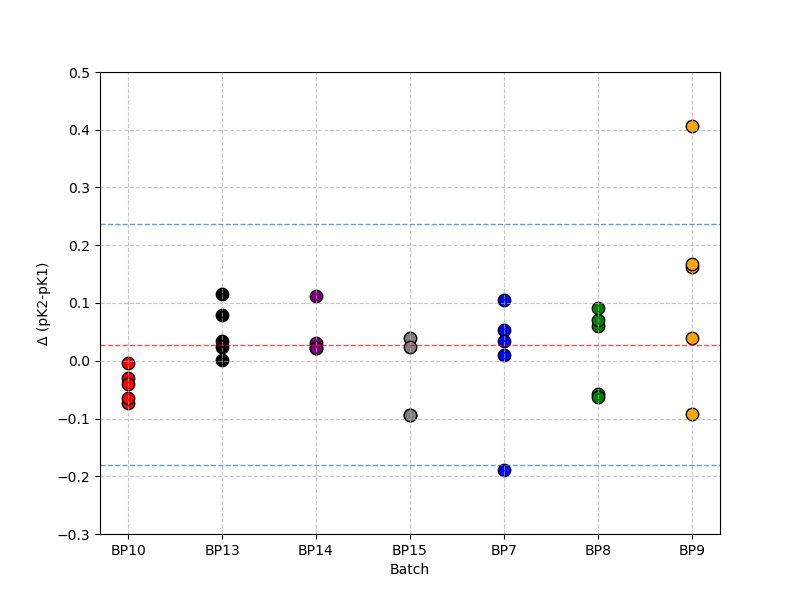

10    0.03893
11    0.40693
12    0.16293
13   -0.09207
14    0.16693
dtype: float64

In [6]:



#Delta pK1 vs. Batch Mean pK1 Comparison
fig2 = plt.figure(figsize=(8, 6))
ax = plt.axes()



for ID, group in batches.items():
    delta_pk2pk1 = (group['pK2_m'] - group['pK1_m'])
    ax.scatter(group['ID'],((delta_pk2pk1)-(Millero2006pK2-Millero2006pK1)), color=colors[ID], edgecolor='black', s=80, label=f"{ID} Mean")


ax.grid(True, linestyle='--', alpha=0.7)

err = ((pk2_fit - pk1_fit) - (Millero2006pK2-Millero2006pK1))

ax.axhline(err.mean() + 2*err.std(), linestyle='--', linewidth=1, alpha=0.7) # +2σ 
ax.axhline(err.mean(), linestyle='--', linewidth=1, alpha=0.7, color='red')
ax.axhline(err.mean() - 2*err.std(), linestyle='--', linewidth=1, alpha=0.7) # -2σ 
ax.set_ylabel("Δ (pK2-pK1)")
ax.set_xlabel("Batch")
ax.set_ylim(-0.3,0.5)


plt.show()


(delta_pk2pk1)-(Millero2006pK2-Millero2006pK1)

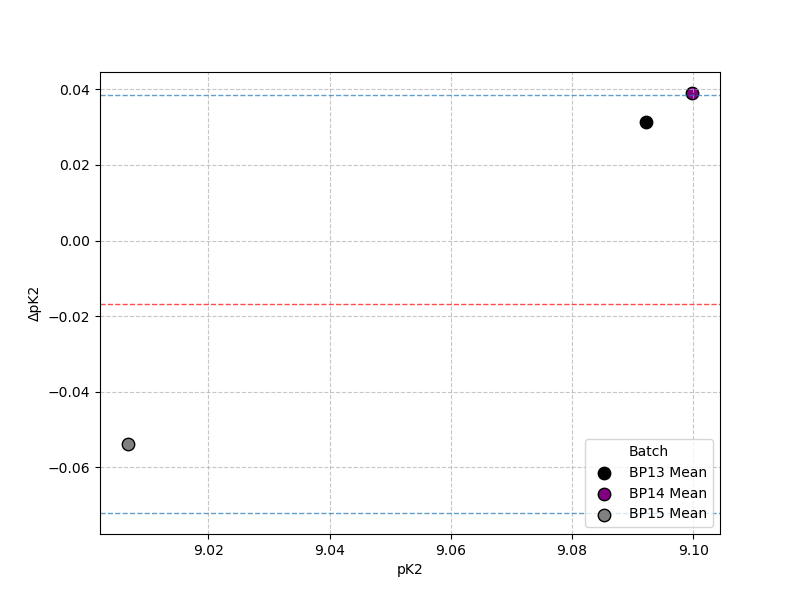

In [58]:

#Delta pK1 vs. Batch Mean pK1 Comparison
fig2 = plt.figure(figsize=(8, 6))
ax = plt.axes()

for ID, group in batches.items():
    mean_delta_pk2 = (group['pK2_m'] - Millero2006pK2).mean()
    ax.scatter(group['pK2_m'].mean(), mean_delta_pk2, color=colors[ID], edgecolor='black', s=80, label=f"{ID} Mean")



ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Batch', loc='lower right')
ax.axhline(delta_pk1.mean() + 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # +2σ 
ax.axhline(delta_pk1.mean(), linestyle='--', linewidth=1, alpha=0.7, color='red')
ax.axhline(delta_pk1.mean() - 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # -2σ 

ax.set_ylabel("ΔpK2")
ax.set_xlabel("pK2")


plt.show()

In [12]:
subsetdf = df[20:33]
subsetdf

,ID,pK1_m,pK2_m,pK1_c,pK2_c,pK1,pK2
20,BP13,5.811,9.091,5.894,9.056,-0.083,0.035
21,BP13,5.898,9.063,5.894,9.056,0.004,0.008
22,BP13,5.883,9.082,5.894,9.056,-0.010,0.027
23,BP13,5.917,9.105,5.894,9.056,0.024,0.049
24,BP13,5.877,9.120,5.894,9.056,-0.016,0.064
25,BP14,5.877,9.071,5.894,9.056,-0.017,0.016
26,BP14,5.891,9.077,5.894,9.056,-0.003,0.021
27,BP14,5.884,9.070,5.894,9.056,-0.010,0.015
28,BP14,5.905,9.181,5.894,9.056,0.012,0.125
29,BP15,5.845,8.915,5.894,9.055,-0.049,-0.140


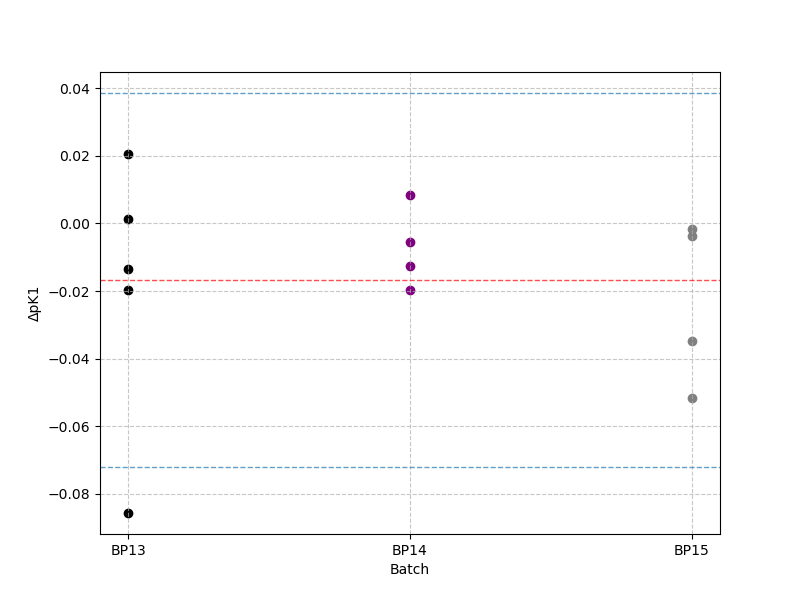

In [13]:


pk1_fit = subsetdf['pK1_m']
pk1_calc = subsetdf['pK1_c']
delta_pk1 = pk1_fit - Millero2006pK1 #meas - calc


batches = {ID: group for ID, group in subsetdf.groupby('ID')}

colors = {
    'BP13': 'black',
    'BP14': 'purple',
    'BP15': 'grey',
}

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.set_ylabel("ΔpK1")
ax.set_xlabel("Batch")
# ax.set_ylim(-0.15,0.05)

for ID, group in batches.items():
    ax.scatter(group['ID'], group['pK1_m']-Millero2006pK1, color=colors[ID], label=ID)


ax.grid(True, linestyle='--', alpha=0.7)
# ax.legend(title='batch')
ax.axhline(delta_pk1.mean() + 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # +2σ 
ax.axhline(delta_pk1.mean(), linestyle='--', linewidth=1, alpha=0.7, color='red')
ax.axhline(delta_pk1.mean() - 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # -2σ 


plt.show()


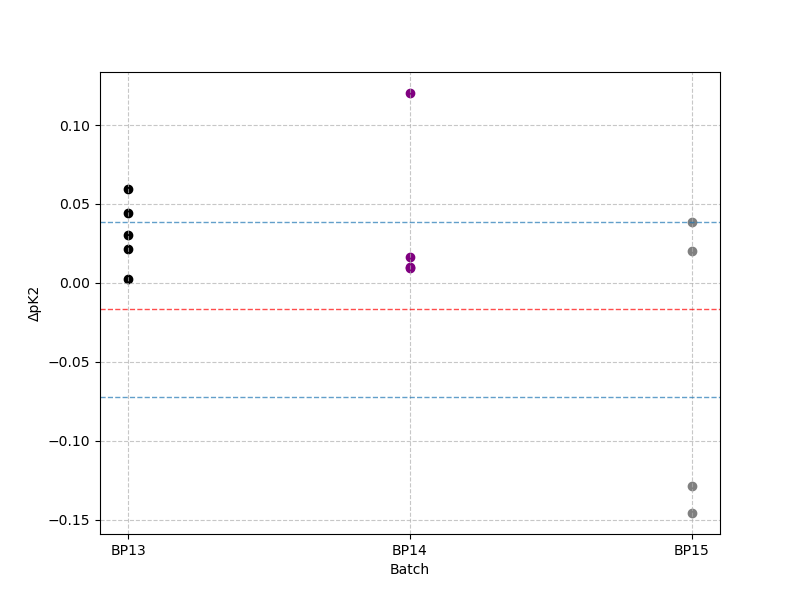

In [15]:


pk2_fit = subsetdf['pK2_m']
pk2_calc = subsetdf['pK2_c']
delta_pk2 = pk2_fit - Millero2006pK2 #meas - calc


batches = {ID: group for ID, group in subsetdf.groupby('ID')}

colors = {
    'BP13': 'black',
    'BP14': 'purple',
    'BP15': 'grey',
}

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.set_ylabel("ΔpK2")
ax.set_xlabel("Batch")
# ax.set_ylim(-0.15,0.05)

for ID, group in batches.items():
    ax.scatter(group['ID'], group['pK2_m']-Millero2006pK2, color=colors[ID], label=ID)


ax.grid(True, linestyle='--', alpha=0.7)
# ax.legend(title='batch')
ax.axhline(delta_pk1.mean() + 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # +2σ 
ax.axhline(delta_pk1.mean(), linestyle='--', linewidth=1, alpha=0.7, color='red')
ax.axhline(delta_pk1.mean() - 2*delta_pk1.std(), linestyle='--', linewidth=1, alpha=0.7) # -2σ 


plt.show()


In [47]:
S1030C13N01

,m( 2),emf_meas,Deltas( 2)
0,0.307,-123.3,-1.8
1,0.410,-120.8,-1.7
2,0.512,-118.2,-1.6
3,0.615,-115.7,-1.5
4,0.717,-113.1,-1.3
...,...,...,...
66,7.068,220.6,0.3
67,7.170,222.0,0.3
68,7.273,223.3,0.3
69,7.375,224.5,0.3


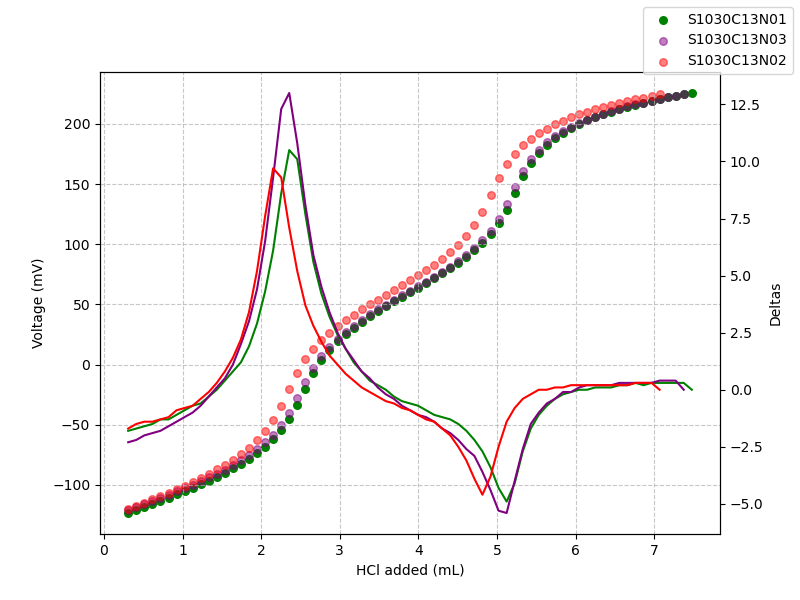

In [56]:

S1030C13N01 = pd.read_csv("~$S1102C15N01.csv") #load one file
S1030C13N02 = pd.read_csv("~$S1102C15N02.csv") #load one file
S1030C13N03 = pd.read_csv("~$S1102C15N03.csv") #load one file



fig = plt.figure(figsize=(8, 6))
ax1 = plt.axes()

# Label for the primary y-axis
ax1.set_ylabel("Voltage (mV)")
ax1.set_xlabel("HCl added (mL)")

# Scatter plots on the primary y-axis
ax1.scatter(S1030C13N01['m( 2)'], S1030C13N01['emf_meas'], color='green', s=30, label='S1030C13N01')
ax1.scatter(S1030C13N03['m( 3)'], S1030C13N03['emf_meas'], color='purple', alpha=0.5, s=30, label='S1030C13N03')
ax1.scatter(S1030C13N02['m( 4)'], S1030C13N02['emf_meas'], color='red', alpha=0.5, s=30, label='S1030C13N02')

# Add a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Deltas")  # Label for the secondary y-axis
# Plot a sample dataset on the secondary y-axis (replace with your data)
ax2.plot(S1030C13N01['m( 2)'], S1030C13N01['Deltas( 2)'], color='green')
ax2.plot(S1030C13N03['m( 3)'], S1030C13N03['Deltas( 3)'], color='purple')
ax2.plot(S1030C13N02['m( 4)'], S1030C13N02['Deltas( 4)'], color='red')

# Add grid, legend, and show the plot
ax1.grid(True, linestyle='--', alpha=0.7)
fig.legend(loc="upper right")
plt.show()
